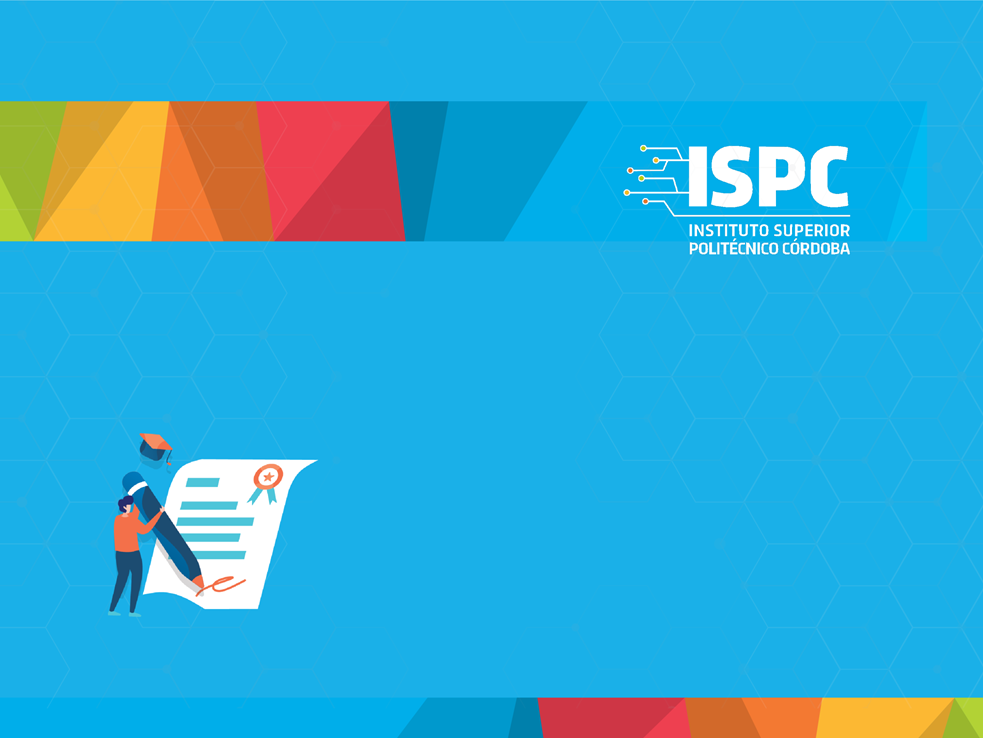

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. ##Regresión lineal

3- Evaluar los resultados. 

4- Agregar otro algoritmo para resolver sobre el mismo set de datos. ##
Multiple Linear Regression
Decision Tree regression
Random Forest Regression
Support Vector Regression





In [1]:
#pip install pydataset
#pip install statsmodels

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from datetime import datetime

# Gráficos
# ==============================================================================
import seaborn as sns
# Apply the default theme
sns.set_theme()

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import sklearn.metrics as metrics

from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
from matplotlib import pyplot as plt


# Configuración warnings
# ==============================================================================
import warnings
warnings.simplefilter("ignore")
    
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [3]:
# Datos
# ==============================================================================

#PONER CODIGO AQUI
boston_data = datasets.load_boston()
datos = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
datos['TARGET'] = pd.Series(boston_data.target)
datos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
datos.shape

(506, 14)

In [5]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

,variable_1,variable_2,r,abs_r
121,RAD,TAX,0.910228,0.910228
134,TAX,RAD,0.910228,0.910228
102,DIS,NOX,-0.769230,0.769230
63,NOX,DIS,-0.769230,0.769230
58,NOX,INDUS,0.763651,0.763651
32,INDUS,NOX,0.763651,0.763651
104,DIS,AGE,-0.747881,0.747881
91,AGE,DIS,-0.747881,0.747881
181,LSTAT,TARGET,-0.737663,0.737663
194,TARGET,LSTAT,-0.737663,0.737663


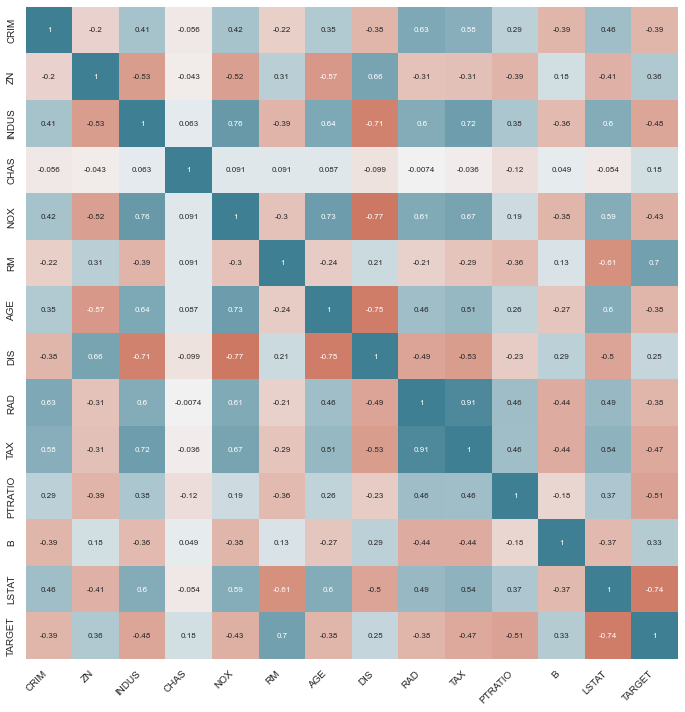

In [6]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

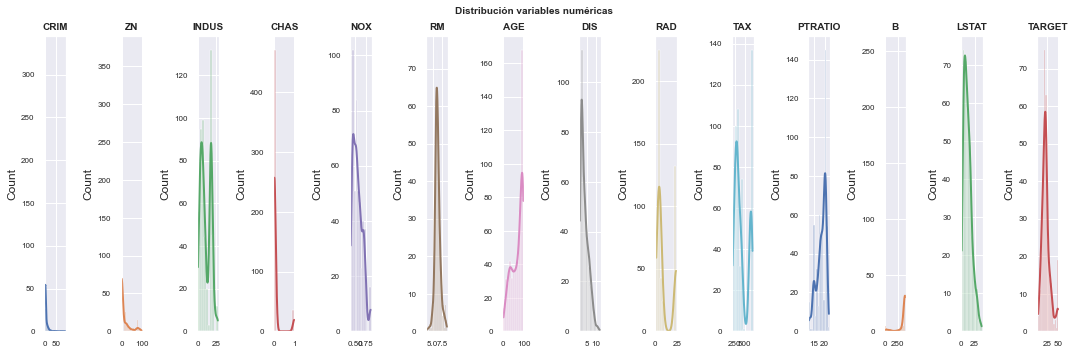

In [7]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=14, figsize=(15, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [8]:
datos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARGET'],
      dtype='object')

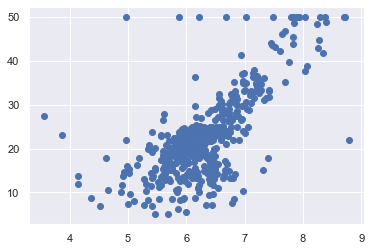

In [9]:
plt.scatter(datos['RM'],datos['TARGET'])

In [10]:
# División de los datos en train y test
# ==============================================================================
X = datos[['LSTAT']]
y = datos['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 0,
                                        shuffle      = True
                                    )


#PONER CODIGO AQUI

# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(
#                     np.hstack((X_train, y_train)),
#                     columns=[]
#               )
# modelo = smf.ols(formula = 'ventas ~ tv + radio + periodico', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

#PONER CODIGO AQUI
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     434.6
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.99e-63
Time:                        19:13:30   Log-Likelihood:                -1145.8
No. Observations:                 354   AIC:                             2296.
Df Residuals:                     352   BIC:                             2303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.7898      0.665     52.353      0.0

In [11]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================

#PONER CODIGO AQUI

y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

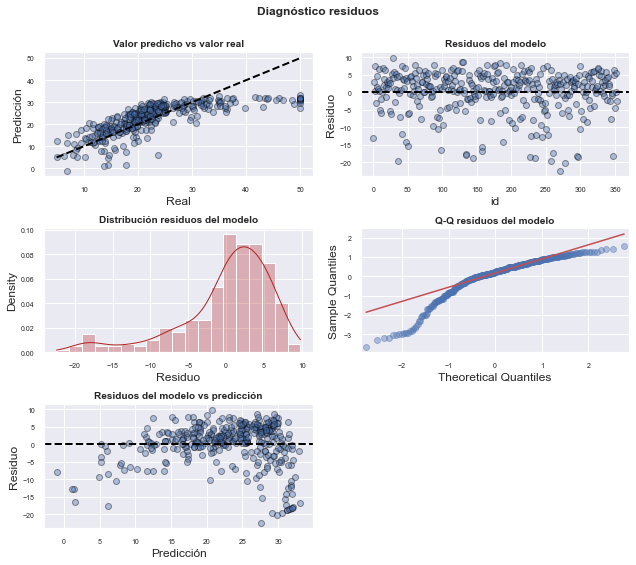

In [12]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [13]:
datos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
datos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARGET'],
      dtype='object')

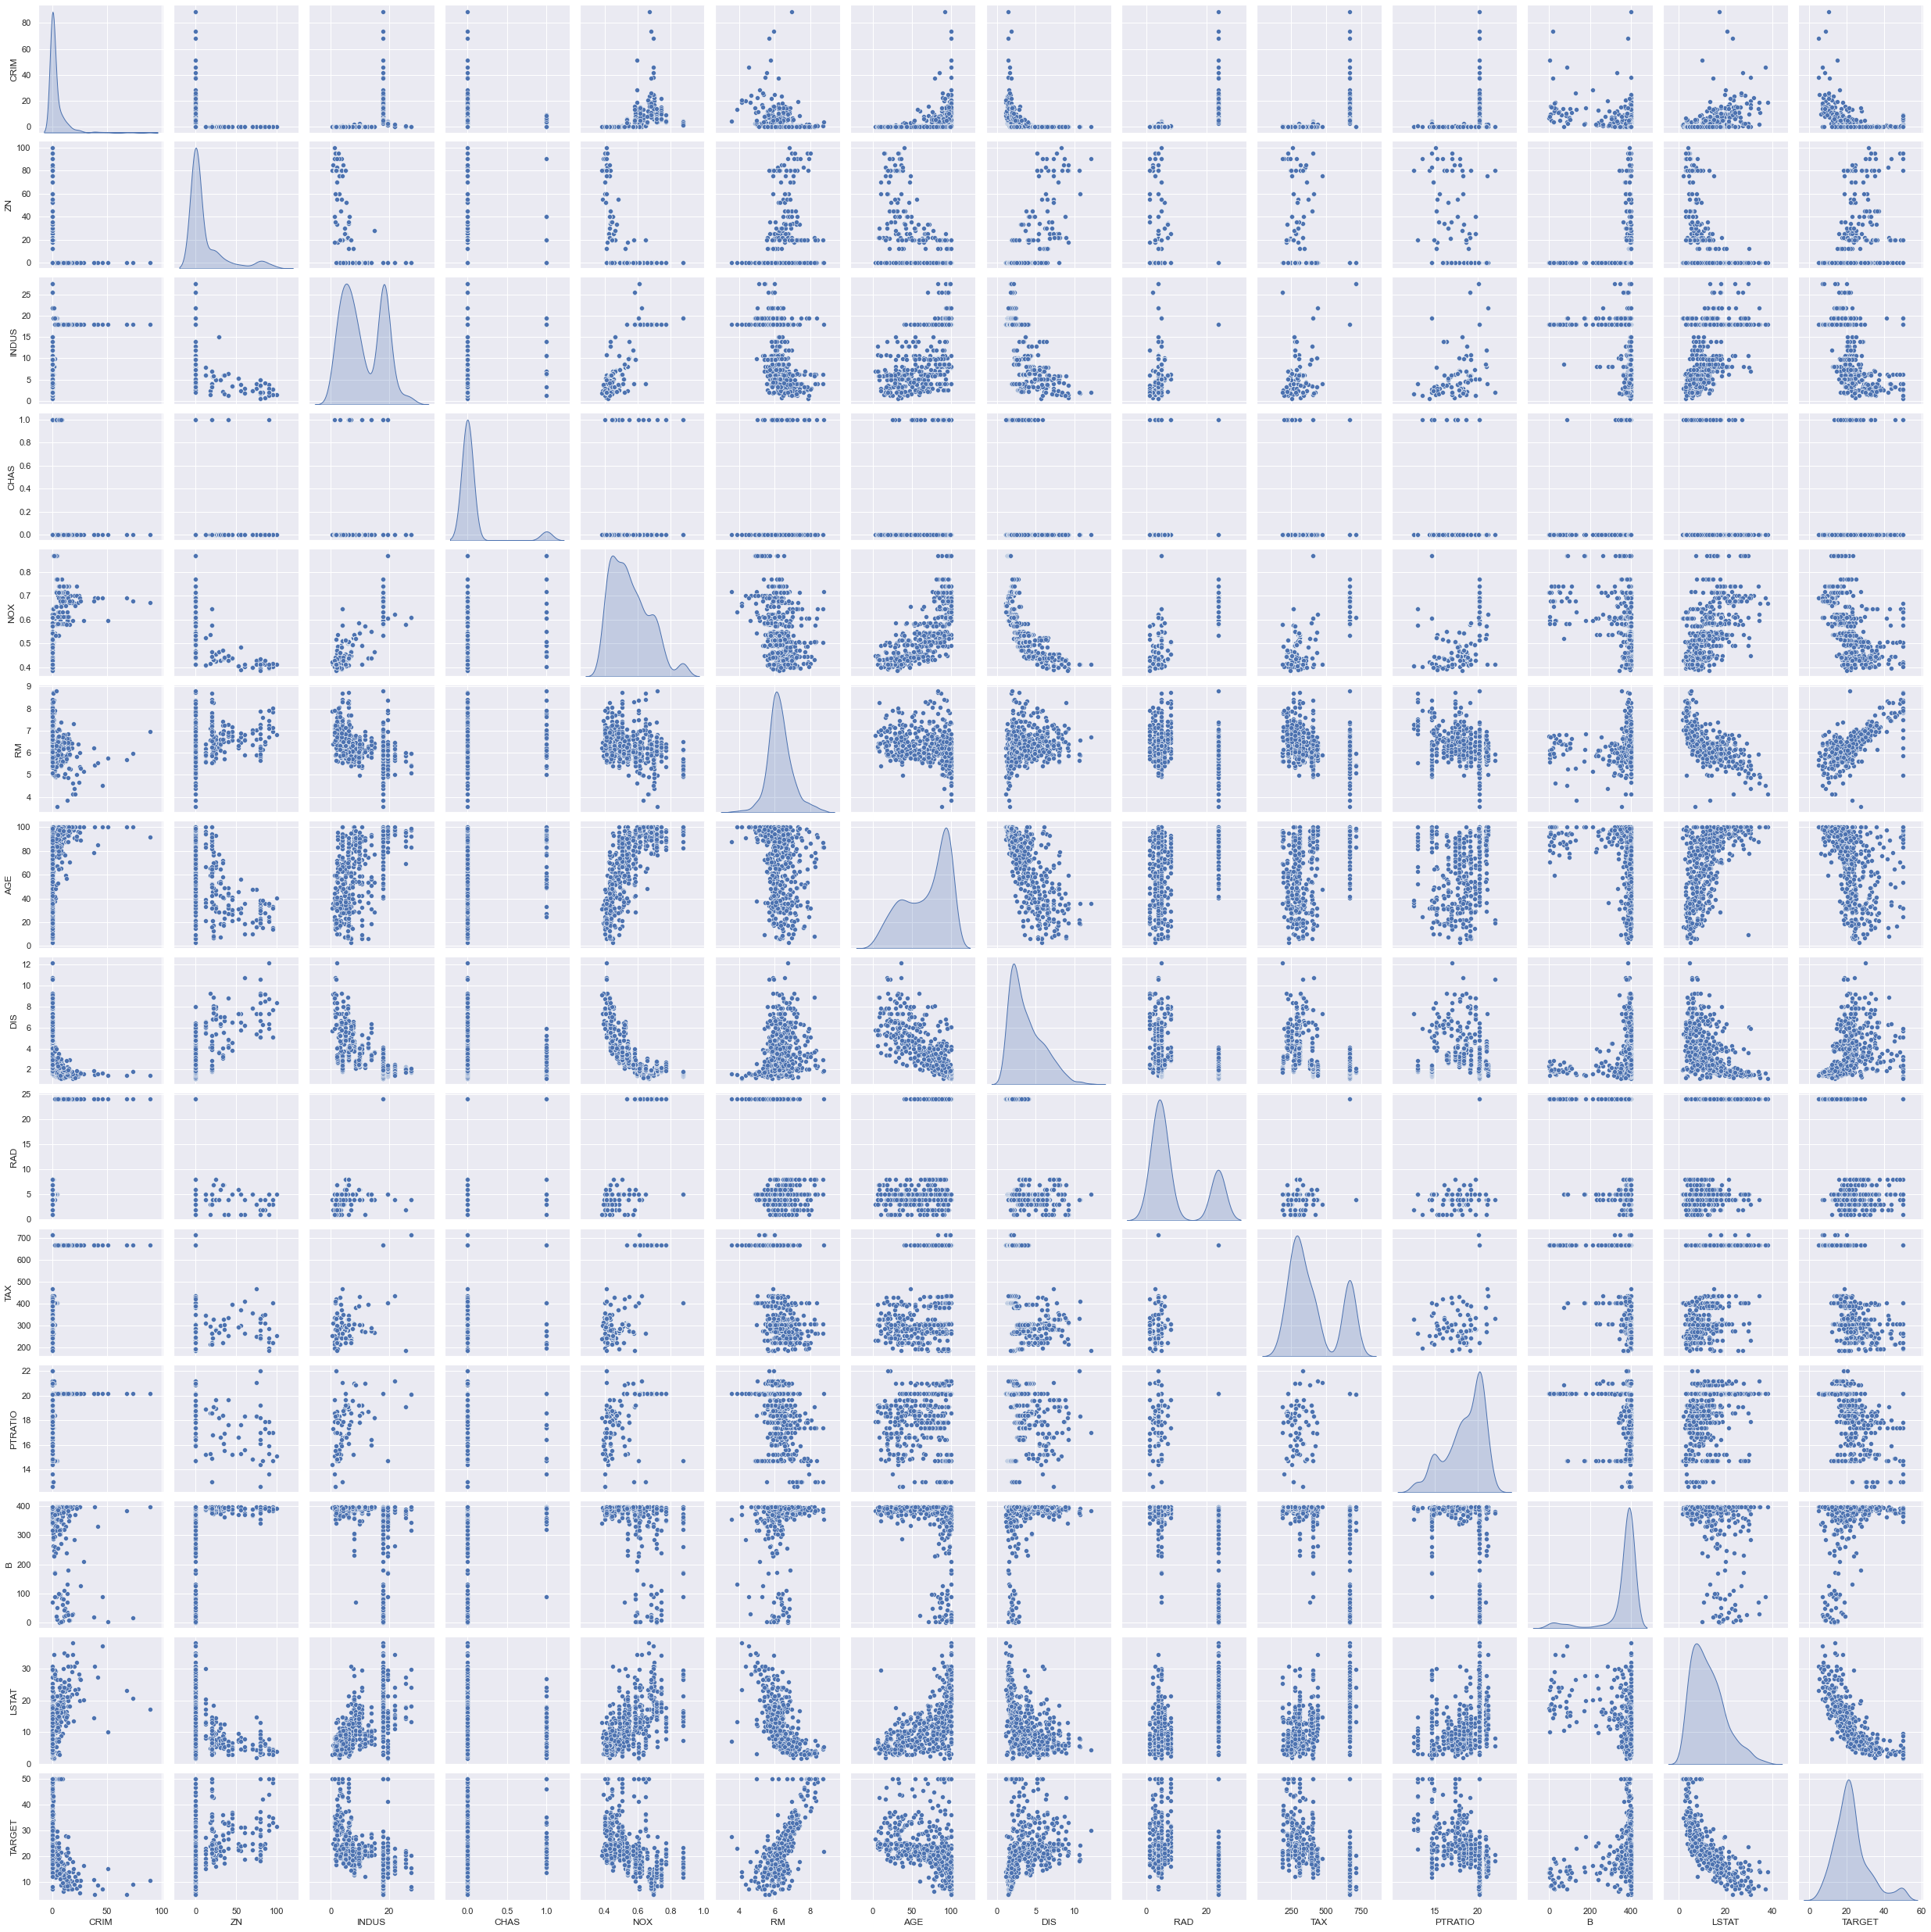

In [16]:
sns.pairplot(datos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARGET']], diag_kind="kde")

In [17]:
train_dataset = datos.sample(frac=0.7,random_state=1234)
test_dataset = datos.drop(train_dataset.index)

In [18]:
# Calculating basic statistics with the train data
train_stats = train_dataset.describe()
train_stats.pop("TARGET") # excluding the dependent variable
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.943477,8.778362,0.00632,0.083235,0.281745,3.755472,73.5341
ZN,354.0,11.656780,23.473241,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,354.0,11.228757,6.902383,0.74000,5.190000,9.900000,18.100000,27.7400
CHAS,354.0,0.070621,0.256554,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,354.0,0.556285,0.114315,0.38900,0.458500,0.538000,0.629250,0.8710
RM,354.0,6.304811,0.726317,3.86300,5.888000,6.211000,6.633500,8.7800
AGE,354.0,69.116949,28.160884,6.00000,45.450000,78.950000,94.100000,100.0000
DIS,354.0,3.764584,2.130622,1.17420,2.090175,3.107300,4.812200,12.1265
RAD,354.0,9.771186,8.804851,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,354.0,412.361582,170.538654,187.00000,279.000000,334.500000,666.000000,711.0000


In [19]:
# Creating the normalizing function with mean and standard deviation
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [20]:
train_labels = train_dataset.pop("TARGET") # using .pop function to store only the dependent variable
test_labels = test_dataset.pop("TARGET")
x_train= normed_train_data.drop('TARGET', axis=1)
x_test= normed_test_data.drop('TARGET', axis=1)
y_train=train_labels
y_test=test_labels

## Testing Multiple linear regression

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
#Prediction using test set 
y_pred = lin_reg.predict(x_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.5472621326882592
MAE:  3.7568746493716194
MSE:  37.259516787552435


## Testing Decision Tree regression

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [23]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(x_train,y_train)
#Predicting using test set 
y_pred = dt_regressor.predict(x_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', dt_regressor.score(x_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.644090398476741
R2 square: 0.644090398476741
MAE:  2.9940789473684206
MSE:  29.290723684210523


## Testing Random Forest Regression

In [24]:
rf_regressor = RandomForestRegressor(n_estimators = 100 ,  random_state = 0)
rf_regressor.fit(x_train,y_train)
#Predicting the SalePrices using test set 
y_pred = rf_regressor.predict(x_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', rf_regressor.score(x_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.7608676086963062
R2 square: 0.7608676086963062
MAE:  2.560855263157895
MSE:  19.680168131578938


In [31]:
rf_regressor = RandomForestRegressor(n_estimators = 10 ,  random_state = 0)
rf_regressor.fit(x_train,y_train)
#Predicting the SalePrices using test set 
y_pred = rf_regressor.predict(x_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', rf_regressor.score(x_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.6925302501099864
R2 square: 0.6925302501099864
MAE:  2.7944736842105264
MSE:  25.30421052631579


In [26]:
from sklearn.svm import SVR

## Testing Support Vector Regression

In [27]:

regressor= SVR(kernel='rbf')
regressor.fit(x_train,y_train)
y_pred_svm=regressor.predict(x_test)
#y_pred_svm = cross_val_predict(regressor, x, y)
mae=metrics.mean_absolute_error(y_test, y_pred_svm)
mse=metrics.mean_squared_error(y_test, y_pred_svm)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', regressor.score(x_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred_svm))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.5127778369496863
R2 square: 0.5127778369496863
MAE:  3.301291437051583
MSE:  40.097512653918876
